# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [1]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datacademy/studentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

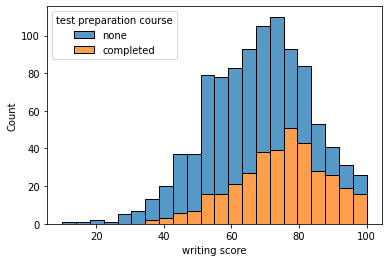

In [10]:
sns.histplot(data=df, x='writing score', hue='test preparation course', multiple='stack')

### Visualizando nuestros datos

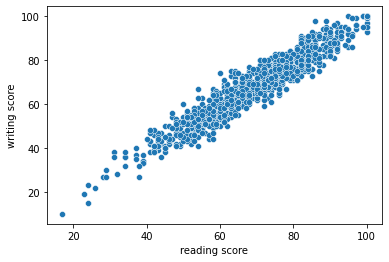

In [11]:
sns.scatterplot(data=df, x='reading score', y='writing score')

### Creando una tabla de frecuencias

In [14]:
freq = df['writing score'].value_counts()
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True)
df_freq = df_freq.rename(columns={'index': 'writing score', 'writing score': 'number of students'})
df_freq

,writing score,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [15]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [16]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

`values` retorna un array con los valores de una columna

In [20]:
X = df['reading score'].values
Y = df['writing score'].values

X = X.reshape(-1, 1)

# Divide data in training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
# Linear Regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)

print(f'La pendiente es: {reg.coef_}')
print(f'La pendiente es: {reg.coef_}')
print(f'El coeficiente de determinación es: {reg.score(X_train, Y_train)}')

La pendiente es: [0.99526956]
La pendiente es: [0.99526956]
El coeficiente de determinación es: 0.9141703758417354


## Visualización de nuestro modelo entrenado

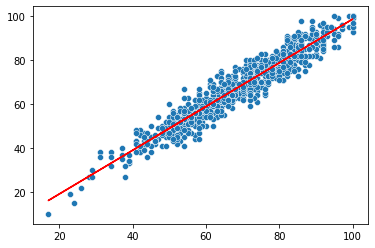

In [24]:
X_flat = X_train.flatten()

# Y_hat = y prediction
Y_hat = reg.predict(X_train)

fig, ax = plt.subplots()
plt.plot(X_train, Y_hat, color='r')
sns.scatterplot(x=X_flat, y=Y_train)

## Evaluación de nuestro modelo

In [25]:
from sklearn.metrics import mean_squared_error

Y_pred = reg.predict(X_test)

# Calculate mean squared error
print(f'Error cuadrático medio: {mean_squared_error(Y_test, Y_pred)}')

Error cuadrático medio: 21.138582473262577


In [26]:
values = pd.DataFrame({'Actual test': Y_test.flatten(), 'Predict': Y_pred.flatten()})
values

,Actual test,Predict
0,51,54.905234
1,69,73.815356
2,49,53.909964
3,84,77.796434
4,46,46.943077
...,...,...
195,86,82.772782
196,99,95.711286
197,58,51.919425
198,75,61.872121
